In [1]:
import os
print(os.getcwd())
os.chdir('/home/vco/Projects/dcr-to-tapn')
print(os.getcwd())

/home/vco/Projects/dcr-to-tapn/notebook
/home/vco/Projects/dcr-to-tapn


In [2]:
import pm4py
from pm4py.objects.petri_net.utils import reachability_graph
from pm4py.visualization.transition_system import visualizer as ts_visualizer
from pm4py.objects.petri_net.transport_invariant import semantics as tapn_semantics
from pm4py.objects.dcr import semantics as dcr_semantics
from pm4py.objects.petri_net.utils import petri_utils as pn_utils

import pandas as pd

from pm4py.objects.dcr.importer import importer as dcr_importer
from pm4py.objects.petri_net.importer import importer as pnml_importer

In [8]:
tapn,m,fm = pnml_importer.apply('/home/vco/Datasets/Sepsis Cases - Event Log_fulloptimization.pnml')
dcr = dcr_importer.apply('/home/vco/Datasets/Sepsis Cases - Event Log.dcrxml')

In [3]:
tapn,m,fm = pnml_importer.apply('/home/vco/Datasets/12683249/Road_Traffic_Fine_Management_Process_fulloptimization.pnml')
dcr = dcr_importer.apply('/home/vco/Datasets/12683249/Road_Traffic_Fine_Management_Process.dcrxml')

In [9]:
dcr['events']

{'Admission IC',
 'Admission NC',
 'CRP',
 'ER Registration',
 'ER Sepsis Triage',
 'ER Triage',
 'IV Antibiotics',
 'IV Liquid',
 'LacticAcid',
 'Leucocytes',
 'Release A',
 'Release B',
 'Release C',
 'Release D',
 'Release E',
 'Return ER'}

In [22]:
dcr_semantics.execute('Create Fine',dcr)
m_out = tapn_semantics.execute(pn_utils.get_transition_by_name(tapn,'init_Create Fine0'),tapn,m)
if m_out is not None:
    m = m_out

In [10]:
print(dcr_semantics.enabled(dcr))
print(tapn_semantics.enabled_transitions(tapn,m))

{'ER Sepsis Triage', 'CRP', 'ER Triage', 'ER Registration', 'IV Liquid', 'LacticAcid', 'Leucocytes'}
{(init_ER Sepsis Triage0, 'init_ER Sepsis Triage0_label'), (event_IV Liquid0, 'event_IV Liquid0_label'), (init_Leucocytes0, 'init_Leucocytes0_label'), (init_CRP0, 'init_CRP0_label'), (init_ER Registration0, 'init_ER Registration0_label'), (event_LacticAcid0, 'event_LacticAcid0_label'), (init_ER Triage0, 'init_ER Triage0_label')}


In [11]:
pn_enabled = tapn_semantics.enabled_transitions(tapn,m)
print(f'PN enabled: {pn_enabled}')
dcr_enabled = dcr_semantics.enabled(dcr)
print(f'DCR enabled: {dcr_enabled}')
print(f'len eq {len(pn_enabled)} == {len(dcr_enabled)} ?: {len(pn_enabled)==len(dcr_enabled)}')

PN enabled: {(init_ER Sepsis Triage0, 'init_ER Sepsis Triage0_label'), (event_IV Liquid0, 'event_IV Liquid0_label'), (init_Leucocytes0, 'init_Leucocytes0_label'), (init_CRP0, 'init_CRP0_label'), (init_ER Registration0, 'init_ER Registration0_label'), (event_LacticAcid0, 'event_LacticAcid0_label'), (init_ER Triage0, 'init_ER Triage0_label')}
DCR enabled: {'ER Sepsis Triage', 'CRP', 'ER Triage', 'ER Registration', 'IV Liquid', 'LacticAcid', 'Leucocytes'}
len eq 7 == 7 ?: True


In [25]:
dcr_semantics.is_accepting(dcr)

True

In [8]:
dcr

{'events': {'AddOrder', 'EditPayment', 'MakePayment'},
 'labels': {'AddOrder', 'EditPaymentinfo', 'MakePayment'},
 'labelMapping': set(),
 'conditionsFor': {'MakePayment': {'EditPayment'}},
 'milestonesFor': {},
 'responseTo': {'AddOrder': {'MakePayment'}},
 'noResponseTo': {},
 'includesTo': {'AddOrder': {'MakePayment'}, 'MakePayment': {'AddOrder'}},
 'excludesTo': {'MakePayment': {'MakePayment'}, 'AddOrder': {'AddOrder'}},
 'conditionsForDelays': {},
 'responseToDeadlines': {},
 'marking': {'executed': set(),
  'included': {'AddOrder', 'EditPayment'},
  'pending': set()}}

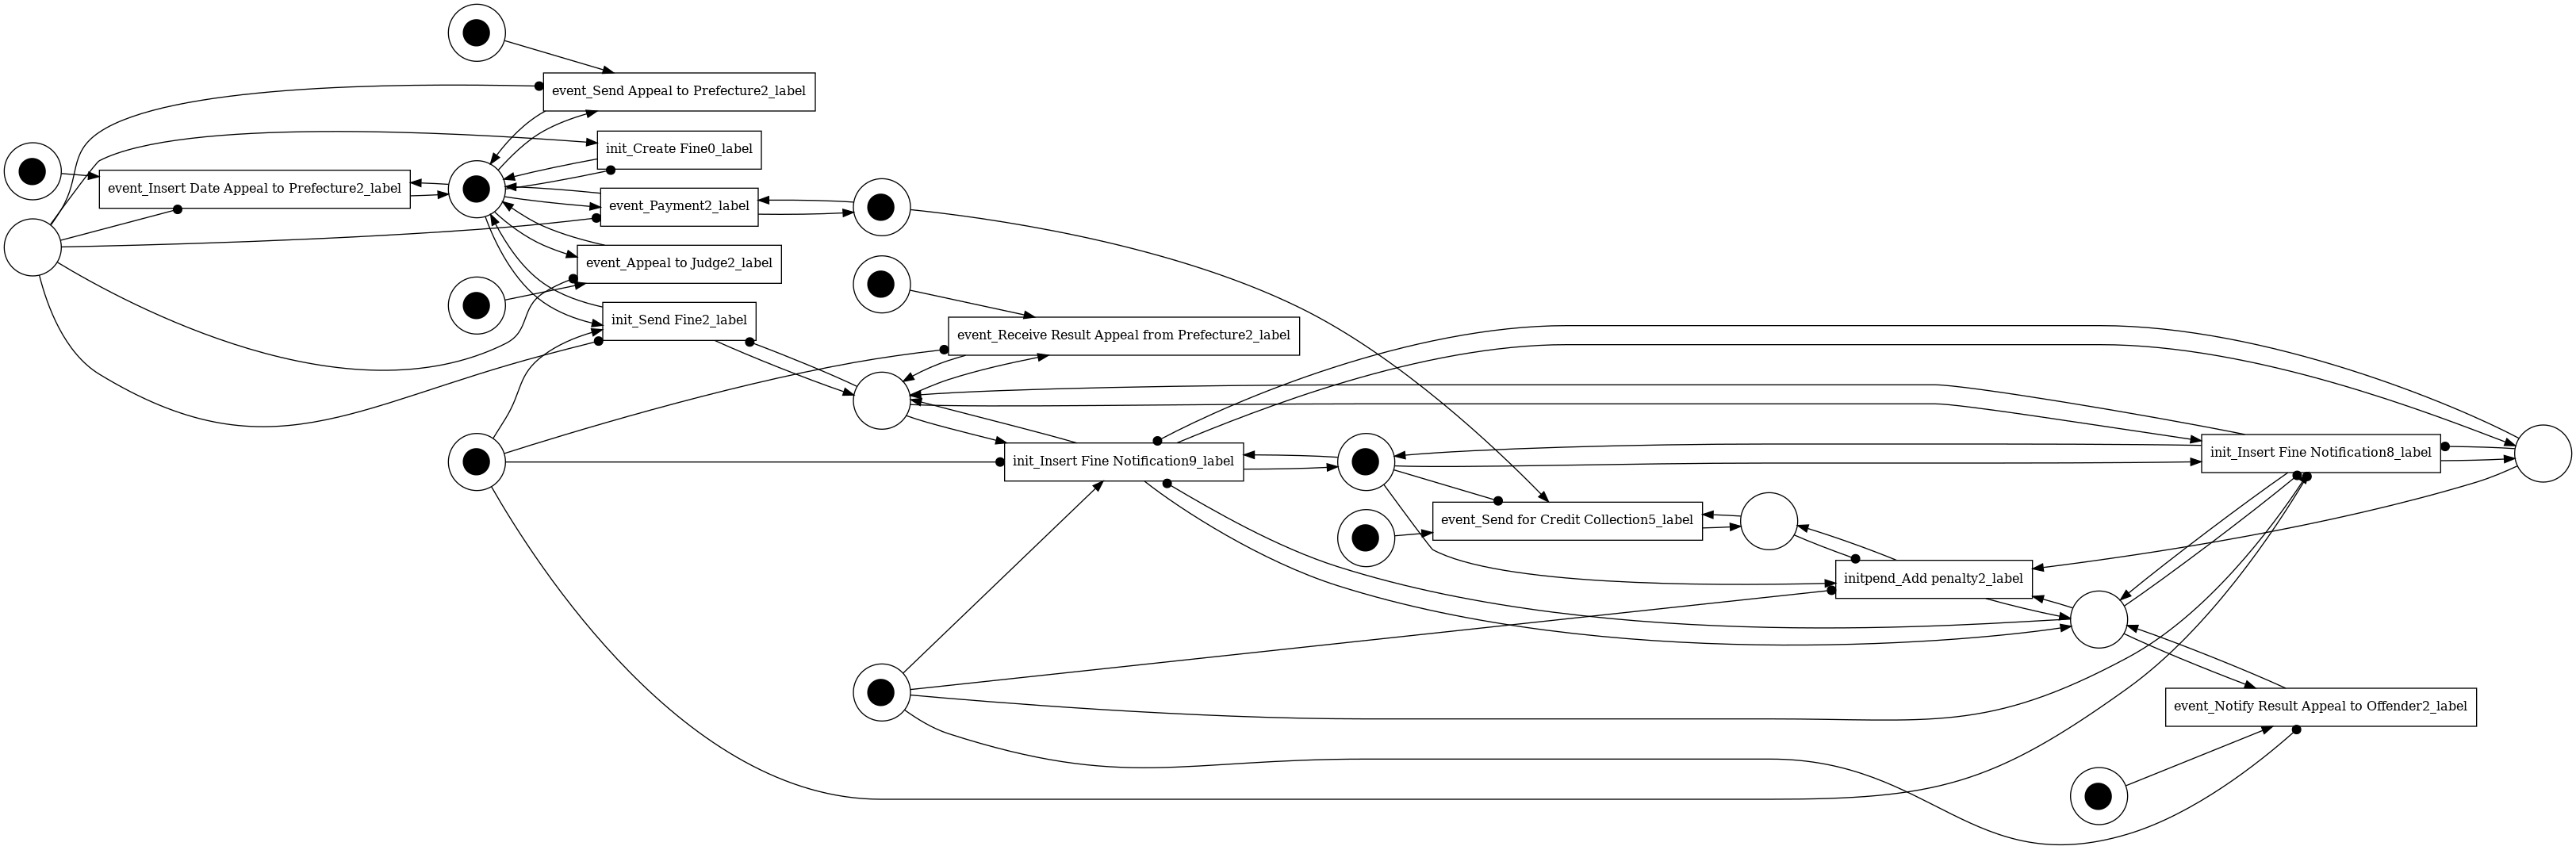

In [26]:
pm4py.view_petri_net(tapn,m,fm,format="png",bgcolor="white")

In [7]:
for root, dirs, files in os.walk('/home/vco/Datasets'):
    for file in files:
        if file.endswith(".dcrxml"):
            print(os.path.join(root, file))

/home/vco/Datasets/BPIC15_1.dcrxml
/home/vco/Datasets/pcc_a5_L2.dcrxml
/home/vco/Datasets/ETM_Configuration3.dcrxml
/home/vco/Datasets/etc_a2a4_L.dcrxml
/home/vco/Datasets/BPIC15_3.dcrxml
/home/vco/Datasets/RequestForPayment.dcrxml
/home/vco/Datasets/Artificial Digital Photo Copier Event Log.dcrxml
/home/vco/Datasets/Statechart Workbench and Alignments Software Event Log.dcrxml
/home/vco/Datasets/ETM_Configuration1.dcrxml
/home/vco/Datasets/nec_a2_L.dcrxml
/home/vco/Datasets/Hospital_log.dcrxml
/home/vco/Datasets/CoSeLoG WABO 3.dcrxml
/home/vco/Datasets/BPI_Challenge_2019.dcrxml
/home/vco/Datasets/Sepsis Cases - Event Log.dcrxml
/home/vco/Datasets/CCC19 - Log XES.dcrxml
/home/vco/Datasets/cancer_admissions.dcrxml
/home/vco/Datasets/Hospital Billing - Event Log.dcrxml
/home/vco/Datasets/PermitLog.dcrxml
/home/vco/Datasets/pcc_a2_L.dcrxml
/home/vco/Datasets/event-log.dcrxml
/home/vco/Datasets/BPI_Challenge_2013_closed_problems.dcrxml
/home/vco/Datasets/ApacheCommons-Crypto-1.0.0-StreamCb

In [8]:
for root, dirs, files in os.walk('/home/vco/Datasets'):
    for file in files:
        if file.endswith(".pnml"):
            print(os.path.join(root, file))

/home/vco/Datasets/etc_a2a4_L_fulloptimization.pnml
/home/vco/Datasets/nec_a2_L_fulloptimization.pnml
/home/vco/Datasets/pcc_a5_L2_fulloptimization.pnml
/home/vco/Datasets/ETM_Configuration4_fulloptimization.pnml
/home/vco/Datasets/ETM_Configuration1_dcranalysis.pnml
/home/vco/Datasets/Sepsis Cases - Event Log_dcranalysis.pnml
/home/vco/Datasets/pcc_a2_L_dcranalysis.pnml
/home/vco/Datasets/pcc_a5_L1_fulloptimization.pnml
/home/vco/Datasets/BPI_Challenge_2013_closed_problems_pnreachability.pnml
/home/vco/Datasets/etc_a2a4_L_dcranalysis.pnml
/home/vco/Datasets/etc_a2a4_L_pnreachability.pnml
/home/vco/Datasets/BPI_Challenge_2013_closed_problems_unoptimized.pnml
/home/vco/Datasets/pcc_a5_L1_dcranalysis.pnml
/home/vco/Datasets/ETM_Configuration3_fulloptimization.pnml
/home/vco/Datasets/pcc_a2_L_unoptimized.pnml
/home/vco/Datasets/cancer_admissions_pnreachability.pnml
/home/vco/Datasets/ETM_Configuration3_unoptimized.pnml
/home/vco/Datasets/pcc_a5_L2_unoptimized.pnml
/home/vco/Datasets/BPI C